In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn.apionly as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt
import iminuit
import probfit
from analysis import selection
style_bar = {
    'color':'#1868AA',
    'edgecolor': '#1868AA'
}

In [2]:
from k3pi_config import get_mode, config
from k3pi_utilities.variables import m, dm, dtf_dm
mode = get_mode('MagBoth', 2015, 'RS')
labels = [m.latex(mode.D0, with_unit=True), dm.latex(with_unit=True)]

In [3]:
mode.mass_fit_pars['fix_NSig'] = True

In [4]:
sel = selection.pid_selection(mode)
sel &= selection.pid_fiducial_selection(mode)
sel &= selection.mass_fiducial_selection(mode)
sel &= selection.remove_secondary(mode)
sel &= selection.slow_pion(mode)

In [5]:
def hist2d(*args, **kwargs):
    kwargs.pop('color')
    return plt.hist2d(*args, **kwargs)

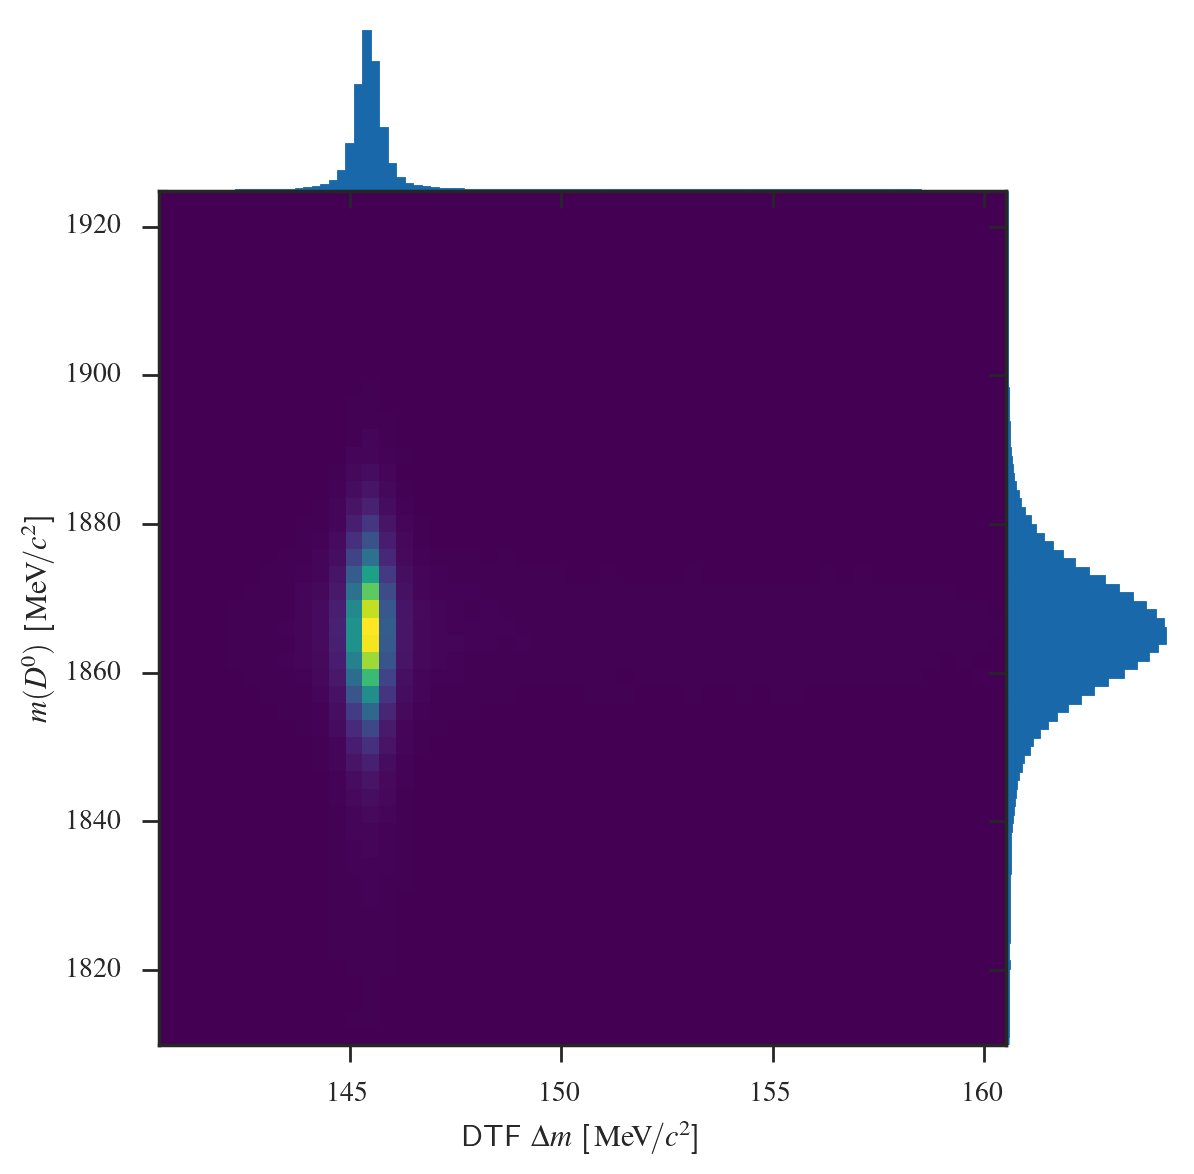

In [6]:
g = sns.JointGrid(x=dtf_dm(), y=m(mode.D0), data=df[sel], space=0)
g.set_axis_labels(xlabel=dtf_dm.latex(with_unit=True), ylabel=m.latex(mode.D0, True))
g.plot_joint(plt.hist2d, bins=50, cmap='viridis')
_ = g.ax_marg_x.hist(df[sel][dtf_dm()], bins=100, **style_bar)
_ = g.ax_marg_y.hist(df[sel][m(mode.D0)], bins=100, orientation="horizontal", **style_bar)
                     
#g.plot_marginals(sns.distplot, bins=100, kde=False, **style_bar)
#g.plot_joint(sns.kdeplot)  
#g.plot_marginals(sns.kdeplot) 

In [7]:
# Mass fit
fit_range_m = np.array([1820,1920])
# G1 = probfit.Normalized(probfit.rename(probfit.ugaussian, ['x', 'mu1', 'sigma1']), fit_range)
signal_m = probfit.Normalized(probfit.rename(probfit.cruijff, ['x', 'mu1', 'sigma1_L', 'sigma1_R', 'alpha1_L', 'alpha1_R']), fit_range_m)
signal_m_e = probfit.Extended(signal_m, extname='NSig')
comb_bkg_m = probfit.Normalized(probfit.Polynomial(1), fit_range_m)
comb_bkg_m_e = probfit.Extended(comb_bkg_m, extname='NBkg')
pdf = probfit.AddPdf(comb_bkg_m_e, signal_m_e)

In [8]:
BL_m = probfit.BinnedLH(pdf, df[sel][m(mode.D0)], extended=True, bound=(fit_range_m,), bins=(100,))
pars_m = dict(mu1=1865., error_mu1=0.2, limit_mu1=(1855., 1875.),
              sigma1_L=5, error_sigma1_L=0.1, limit_sigma1_L=(0.001, 15.),
              sigma1_R=5, error_sigma1_R=0.1, limit_sigma1_R=(0.001, 15.),
              alpha1_L=0.2, error_alpha1_L=0.001, limit_alpha1_L=(0.001, 1.),
              alpha1_R=0.2, error_alpha1_R=0.001, limit_alpha1_R=(0.001, 1.),
              c_0 = 1, error_c_0 = 0.1, fix_c_0=True,
              c_1 = -0.0, error_c_1 = 0.00001, limit_c_1=(-1./fit_range_m[1],0.01),
              NSig = 360000., error_NSig=500, limit_NSig=(1000., 800000),
              NBkg = 50000., error_NBkg=500, limit_NBkg=(1000., 500000)
             )
minuit_m = iminuit.Minuit(BL_m, **pars_m);

In [9]:
minuit_m.migrad();

FCN = 45.2387711709 
 TOTAL NCALL = 546 
 NCALLS = 546 
 
 
 EDM = 2.75581238729e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c_0,1,0.1,0,0,,,FIXED
2,c_1,-0.000476646,4.28953e-06,0,0,-0.000520833333333,0.01,
3,NBkg,35788.6,634.313,0,0,1000.0,500000.0,
4,mu1,1865.31,0.0493546,0,0,1855.0,1875.0,
5,sigma1_L,6.67829,0.0486975,0,0,0.001,15.0,
6,sigma1_R,7.03976,0.0470474,0,0,0.001,15.0,
7,alpha1_L,0.129911,0.00347581,0,0,0.001,1.0,
8,alpha1_R,0.080566,0.00279051,0,0,0.001,1.0,
9,NSig,384952,866.908,0,0,1000.0,800000.0,


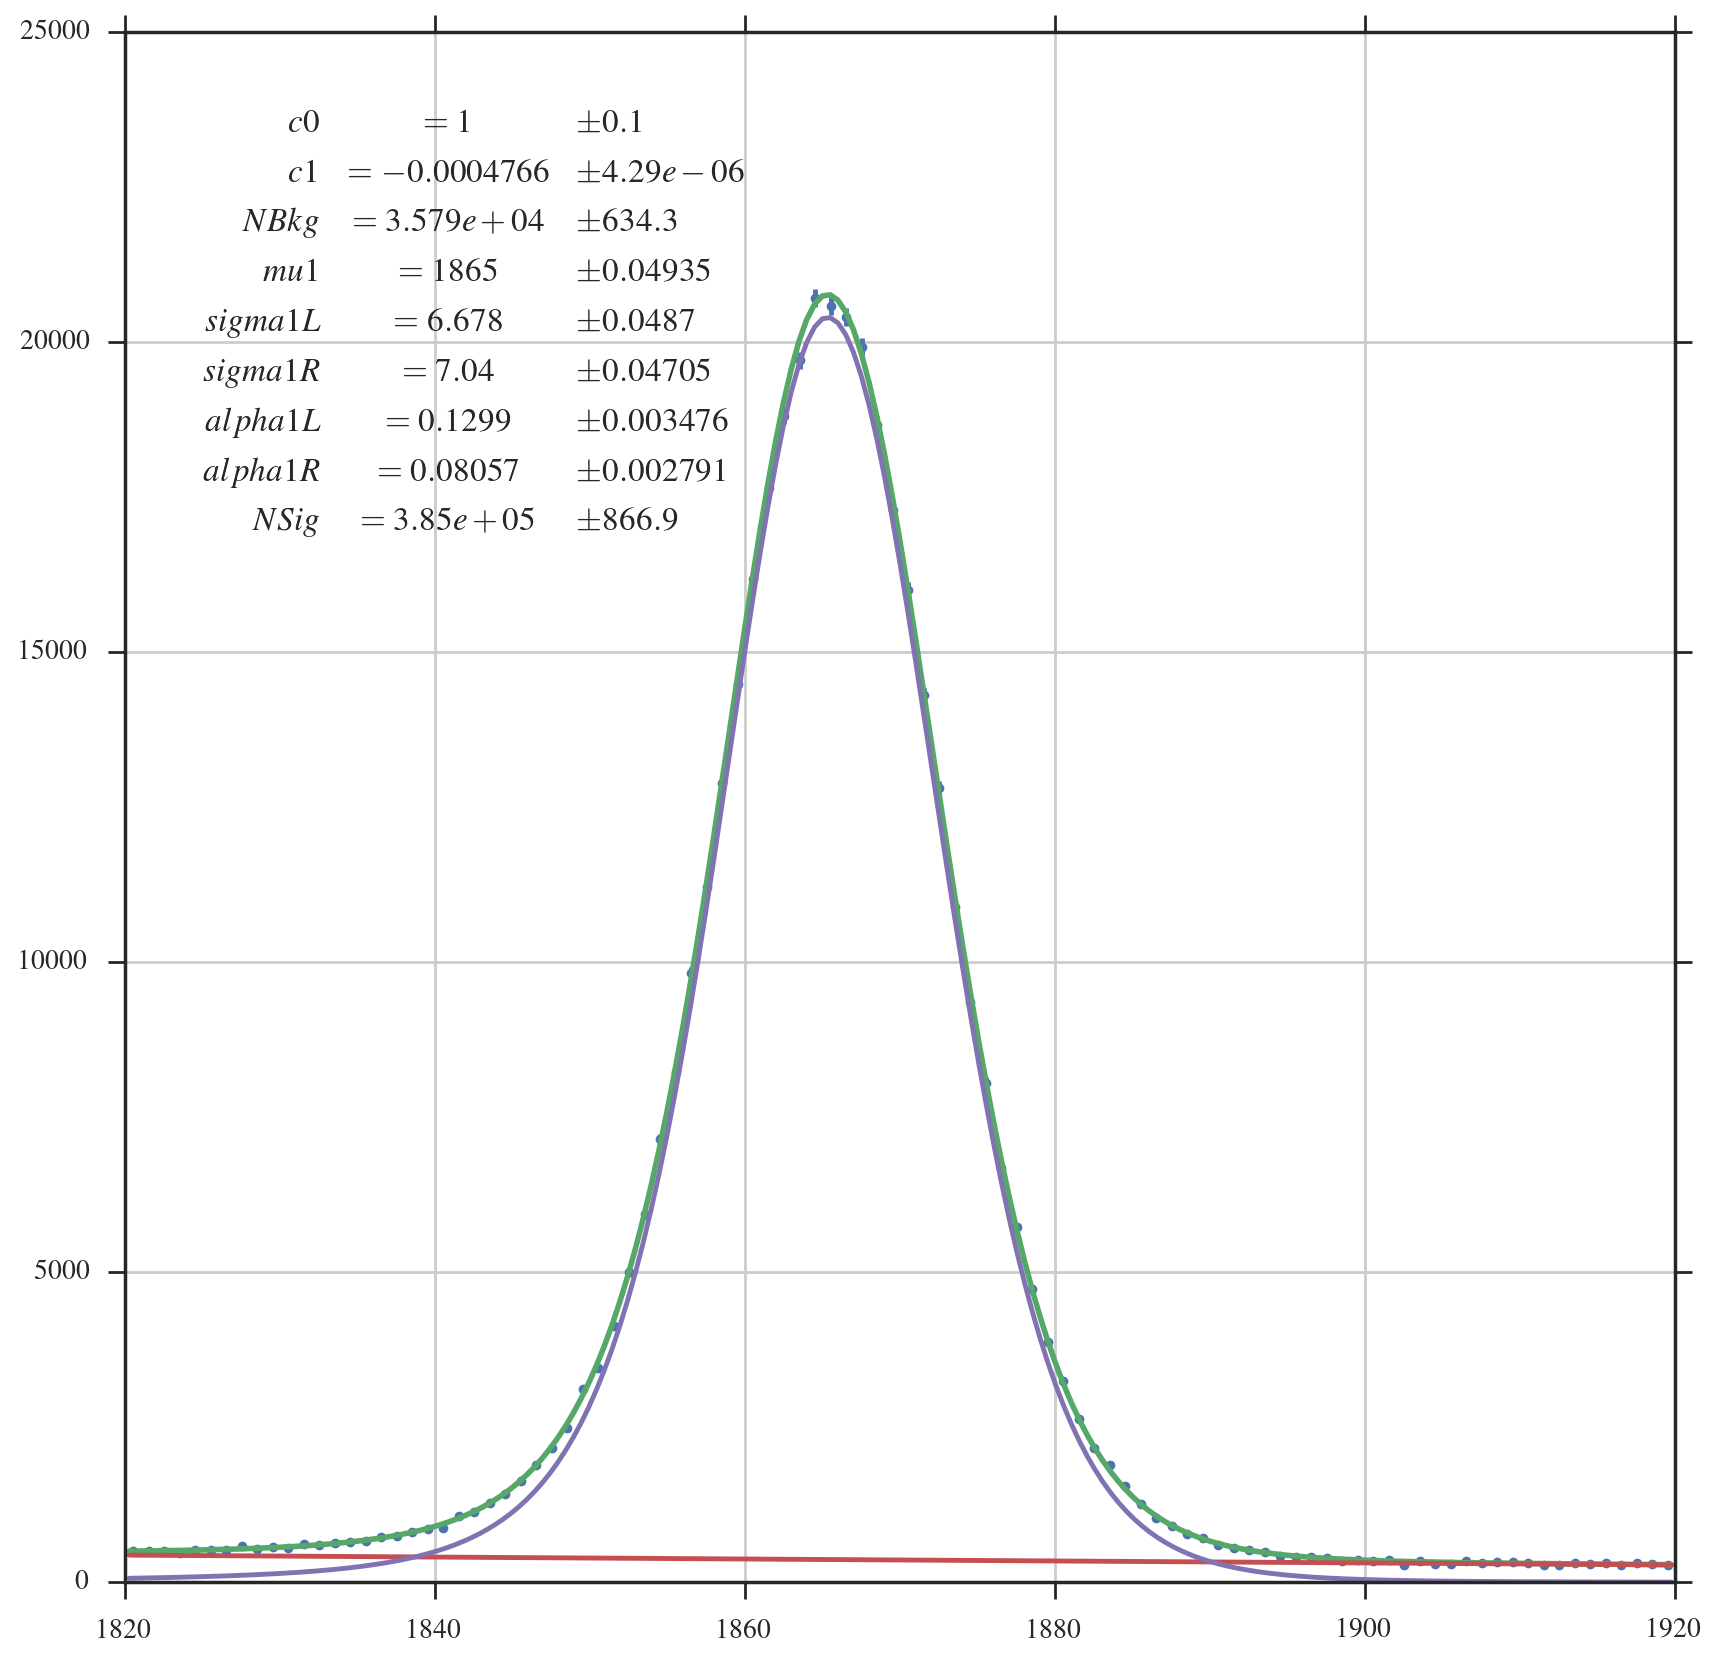

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
BL_m.draw(minuit_m, dim=0, parts=True, ax=ax);

In [38]:
minuit_m.print_matrix()

+,c_1,NBkg,mu1,sigma1_L,sigma1_R,alpha1_L,alpha1_R,NSig
c_1,1.00,-0.65,-0.39,-0.57,0.33,0.77,-0.18,0.47
NBkg,-0.65,1.00,0.23,0.49,-0.03,-0.79,-0.31,-0.67
mu1,-0.39,0.23,1.00,0.84,-0.84,-0.54,0.50,-0.17
sigma1_L,-0.57,0.49,0.84,1.00,-0.61,-0.83,0.27,-0.36
sigma1_R,0.33,-0.03,-0.84,-0.61,1.00,0.34,-0.81,0.02
alpha1_L,0.77,-0.79,-0.54,-0.83,0.34,1.00,-0.03,0.58
alpha1_R,-0.18,-0.31,0.50,0.27,-0.81,-0.03,1.00,0.22
NSig,0.47,-0.67,-0.17,-0.36,0.02,0.58,0.22,1.00


In [11]:
fit_range_dm=np.array([141, 155])
comb_bkg_dm = probfit.Normalized(probfit.rename(probfit.delta_mass_bkg, ['x', 'p_bkg', 'a_bkg']), fit_range_dm)
comb_bkg_dm_e = probfit.Extended(comb_bkg_dm, extname='NBkg')
signal_dm = probfit.rename(probfit.cruijff, ['x', 'mu_dm', 'sigma_dm_L', 'sigma_dm_R', 'alpha_dm_L', 'alpha_dm_R'])
signal_dm_e = probfit.Extended(probfit.Normalized(signal_dm, fit_range_dm), extname='NSig')
pdf_dm = probfit.AddPdf(comb_bkg_dm_e, signal_dm_e)

In [12]:
BL_dm = probfit.BinnedLH(pdf_dm, df[sel][dtf_dm()].values, extended=True, bound=(fit_range_dm,), bins=(100,), nint_subdiv=3)

In [13]:
pars_dm = dict(mu_dm=145.5, error_mu_dm=2, limit_mu_dm=(140,150),
            sigma_dm_L=0.2, error_sigma_dm_L=0.02, limit_sigma_dm_L=(0.0001,1.),
            sigma_dm_R=0.2, error_sigma_dm_R=0.02, limit_sigma_dm_R=(0.0001,1.),
            alpha_dm_L=0.2, error_alpha_dm_L=0.02, limit_alpha_dm_L=(0.0001,1.),
            alpha_dm_R=0.2, error_alpha_dm_R=0.02, limit_alpha_dm_R=(0.0001,1.),
            a_bkg=1.2, error_a_bkg=0.1, limit_a_bkg=(0.0001, 5.),
            p_bkg=-0.03, error_p_bkg=0.01, limit_p_bkg=(-0.5, 0.5),
            #alpha_L=0.02, limit_alpha_L=(0.0001, 0.15),
            #alpha_R=0.02, limit_alpha_R=(0.0001, 0.15),
            NSig=400000, error_NSig=10000, limit_NSig=(100000, 600000),
            NBkg=40000, error_NBkg=5000, limit_NBkg=(10000, 600000))

In [14]:
minuit_dm = iminuit.Minuit(BL_dm, **pars_dm)

In [15]:
minuit_dm.migrad();

FCN = 246.97529513 
 TOTAL NCALL = 567 
 NCALLS = 567 
 
 
 EDM = 9.02032765918e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p_bkg,-0.0291768,0.000643789,0,0,-0.5,0.5,
2,a_bkg,2.07427,0.161063,0,0,0.0001,5.0,
3,NBkg,10000,143.424,0,0,10000.0,600000.0,
4,mu_dm,145.44,0.00135318,0,0,140.0,150.0,
5,sigma_dm_L,0.246091,0.00102136,0,0,0.0001,1.0,
6,sigma_dm_R,0.235706,0.000977062,0,0,0.0001,1.0,
7,alpha_dm_L,0.184782,0.000640894,0,0,0.0001,1.0,
8,alpha_dm_R,0.199985,0.000398699,0,0,0.0001,1.0,
9,NSig,398110,638.78,0,0,100000.0,600000.0,


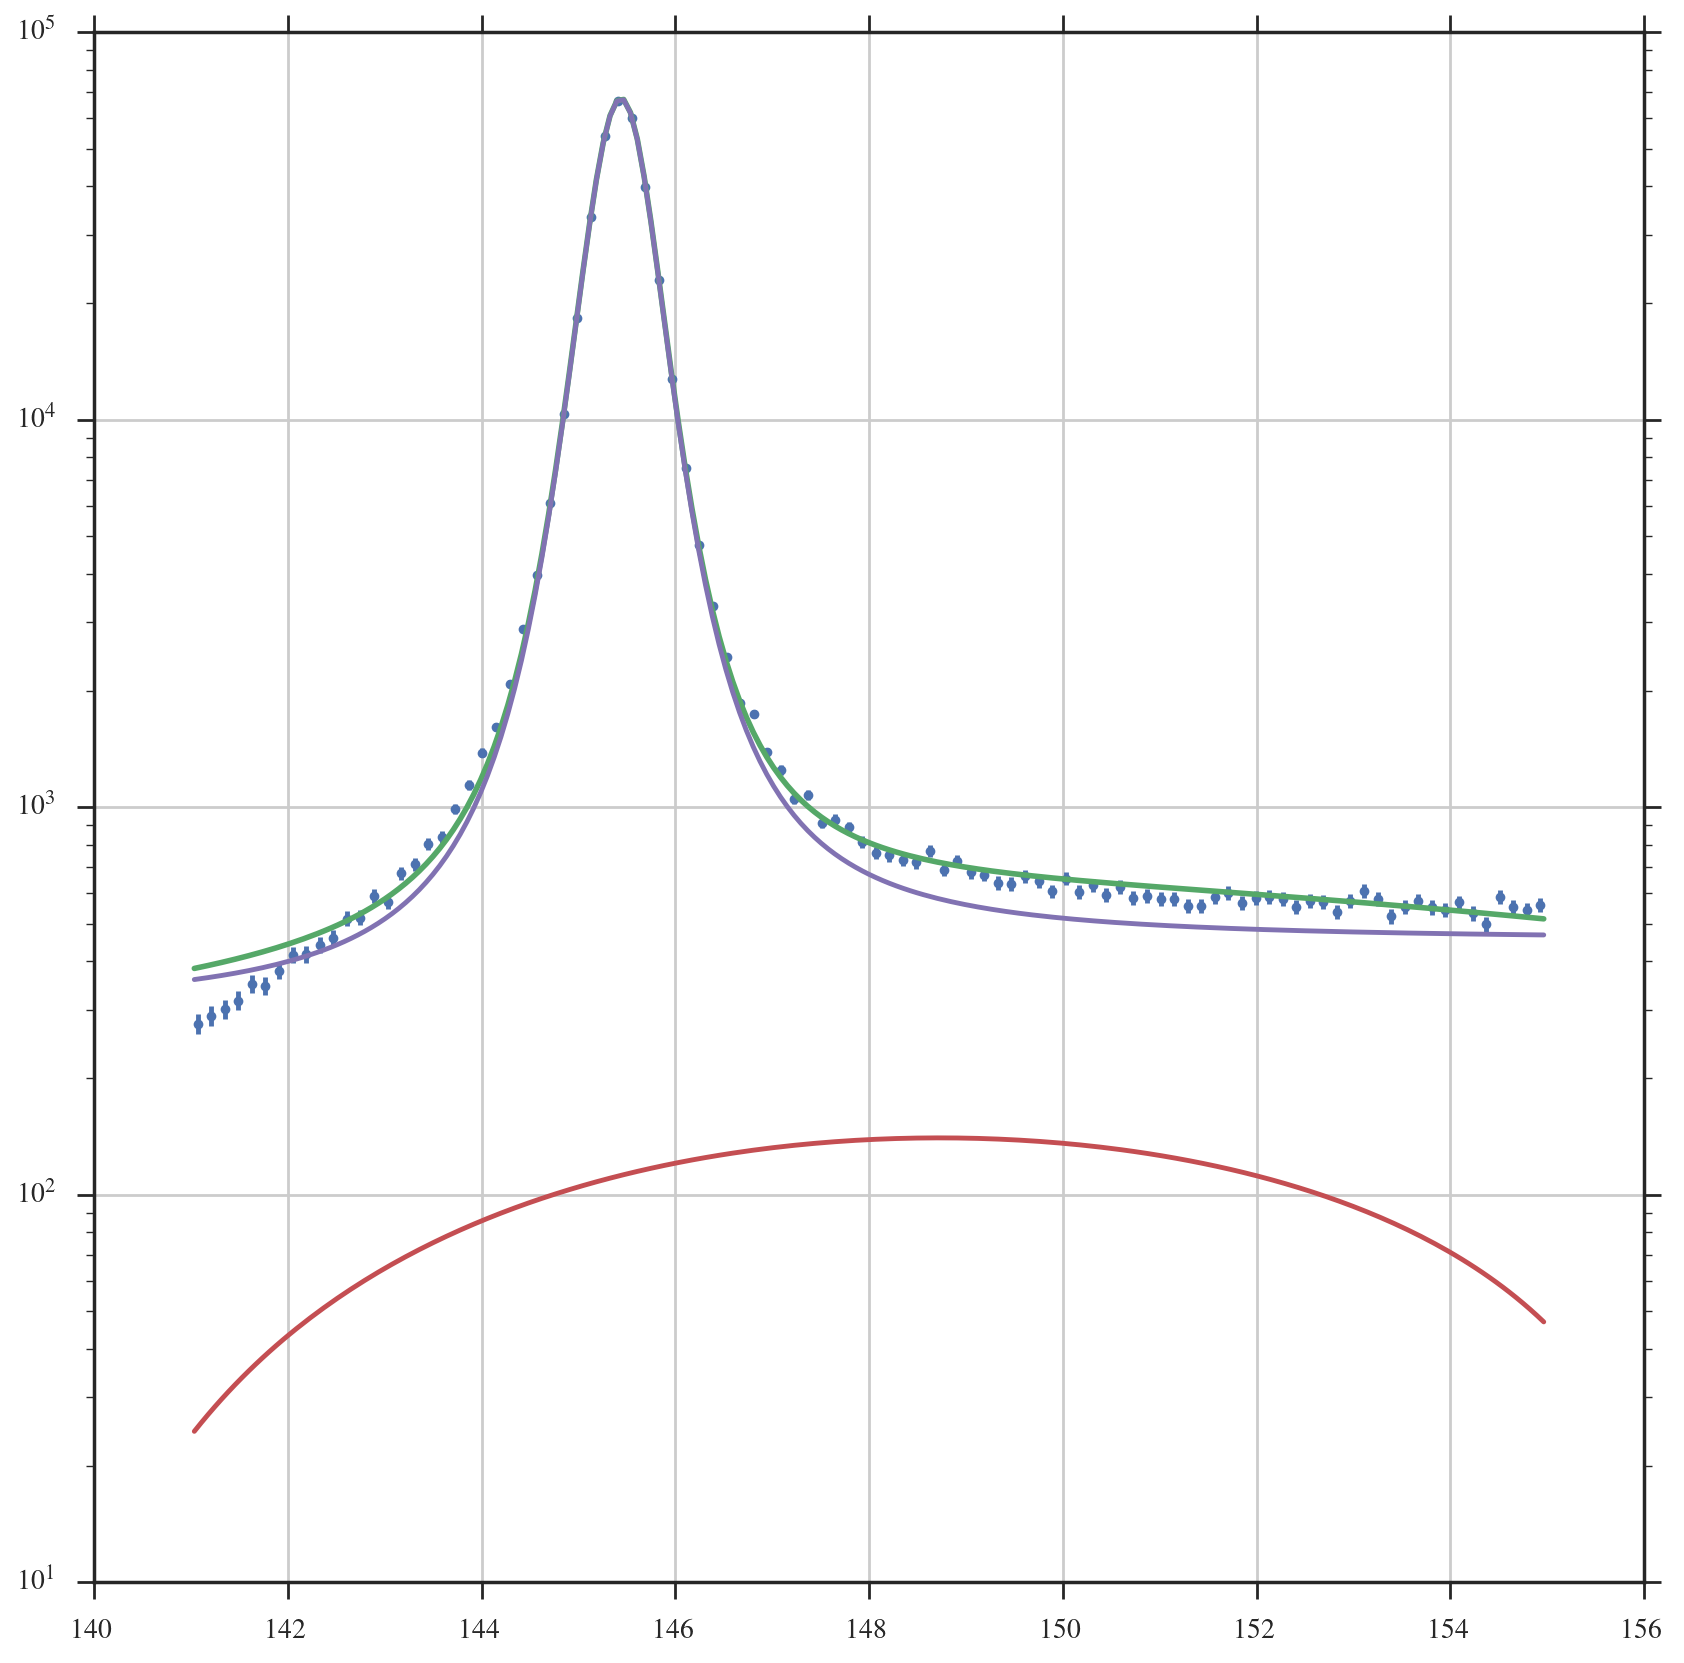

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
BL_dm.draw(parts=True, dim=0, print_par=False, ax=ax);
ax.set_yscale("log", nonposy='clip')

In [17]:
slow_pi_dm = probfit.Normalized(probfit.rename(probfit.delta_mass_bkg, ['x', 'p_sp', 'a_sp']), fit_range_dm)
slow_pi_dm_e = probfit.Extended(slow_pi_dm, extname='NSP')
pdf_dm = probfit.AddPdf(comb_bkg_dm_e, signal_dm_e)

signal=probfit.ProdPdf(signal_m, signal_dm)
signal_e = probfit.Extended(signal, extname='NSig')

comb_bkg = probfit.ProdPdf(comb_bkg_m, comb_bkg_dm)
comb_bkg_e = probfit.Extended(comb_bkg, extname='NBkg')

slow_pi = probfit.ProdPdf(signal_m, slow_pi_dm)
slow_pi_e = probfit.Extended(slow_pi, extname='NSPi')

prods=[signal, comb_bkg, slow_pi]

total = probfit.AddPdf(signal_e, comb_bkg_e, slow_pi_e)

In [18]:
pars = pars_m.copy()
pars.update(pars_dm)
pars.update(minuit_m.values)
pars.update(minuit_dm.values)

pars.update(dict(NSPi=pars['NBkg']/2., error_NSPi=5000, limit_NSPi=(10000, 600000),
                 a_sp=1.2, error_a_sp=0.1, limit_a_sp=(0.0001, 5.),
                 p_sp=-0.03, error_p_sp=0.01, limit_p_sp=(-0.5, 0.5),))

In [30]:
BL = probfit.BinnedLH(total, df[sel][[m(mode.D0), dtf_dm()]].values, extended=True, bound=(fit_range_m, fit_range_dm), bins=(100,100))

In [41]:
pars.update(minuit.values)
pars.update(minuit_m.values)
pars.update(dict(fix_mu1=True, fix_sigma1_L=True, fix_sigma1_R=True, fix_alpha1_L=True, fix_alpha1_R=True, limit_NSPi=(1000., 20000.)))

In [42]:
minuit = iminuit.Minuit(BL, **pars)

In [ ]:
minuit.migrad();

/afs/cern.ch/user/d/dmuller/.virtualenvs/k3pi/lib/python2.7/site-packages/ipykernel/__main__.py:1: LogWarning: x is really small return 0
  if __name__ == '__main__':


In [37]:
minuit.print_matrix()

+,mu1,sigma1_L,sigma1_R,alpha1_L,alpha1_R,mu_dm,sigma_dm_L,sigma_dm_R,alpha_dm_L,alpha_dm_R,NSig,c_1,p_bkg,a_bkg,NBkg,p_sp,a_sp,NSPi
mu1,1.00,0.83,-0.83,-0.51,0.52,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.09,0.01,-0.00,-0.00,-0.00,0.00,-0.00
sigma1_L,0.83,1.00,-0.60,-0.75,0.37,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,-0.10,-0.01,0.00,0.02,0.00,-0.00,-0.00
sigma1_R,-0.83,-0.60,1.00,0.38,-0.80,0.00,-0.00,-0.00,0.00,0.00,-0.01,0.12,-0.03,0.01,0.03,0.01,-0.00,0.00
alpha1_L,-0.51,-0.75,0.38,1.00,-0.22,0.00,0.01,0.01,0.03,0.07,-0.00,0.22,0.07,-0.03,-0.19,-0.02,0.00,-0.00
alpha1_R,0.52,0.37,-0.80,-0.22,1.00,0.00,0.00,0.00,0.02,0.04,0.01,-0.17,0.08,-0.03,-0.15,-0.02,0.00,-0.00
mu_dm,-0.00,-0.00,0.00,0.00,0.00,1.00,0.78,-0.78,-0.42,0.36,-0.02,0.00,0.03,-0.06,-0.01,-0.04,-0.16,0.00
sigma_dm_L,-0.00,-0.01,-0.00,0.01,0.00,0.78,1.00,-0.51,-0.60,0.33,-0.35,0.01,0.05,-0.09,-0.00,0.03,-0.21,0.00
sigma_dm_R,-0.00,-0.00,-0.00,0.01,0.00,-0.78,-0.51,1.00,0.38,-0.50,-0.32,-0.00,-0.02,0.05,0.03,0.09,0.19,-0.00
alpha_dm_L,-0.00,-0.00,0.00,0.03,0.02,-0.42,-0.60,0.38,1.00,-0.35,0.05,0.04,-0.07,0.17,-0.13,-0.12,0.47,0.00
alpha_dm_R,-0.00,-0.00,0.00,0.07,0.04,0.36,0.33,-0.50,-0.35,1.00,-0.04,0.08,0.08,-0.13,-0.26,-0.04,-0.37,0.01


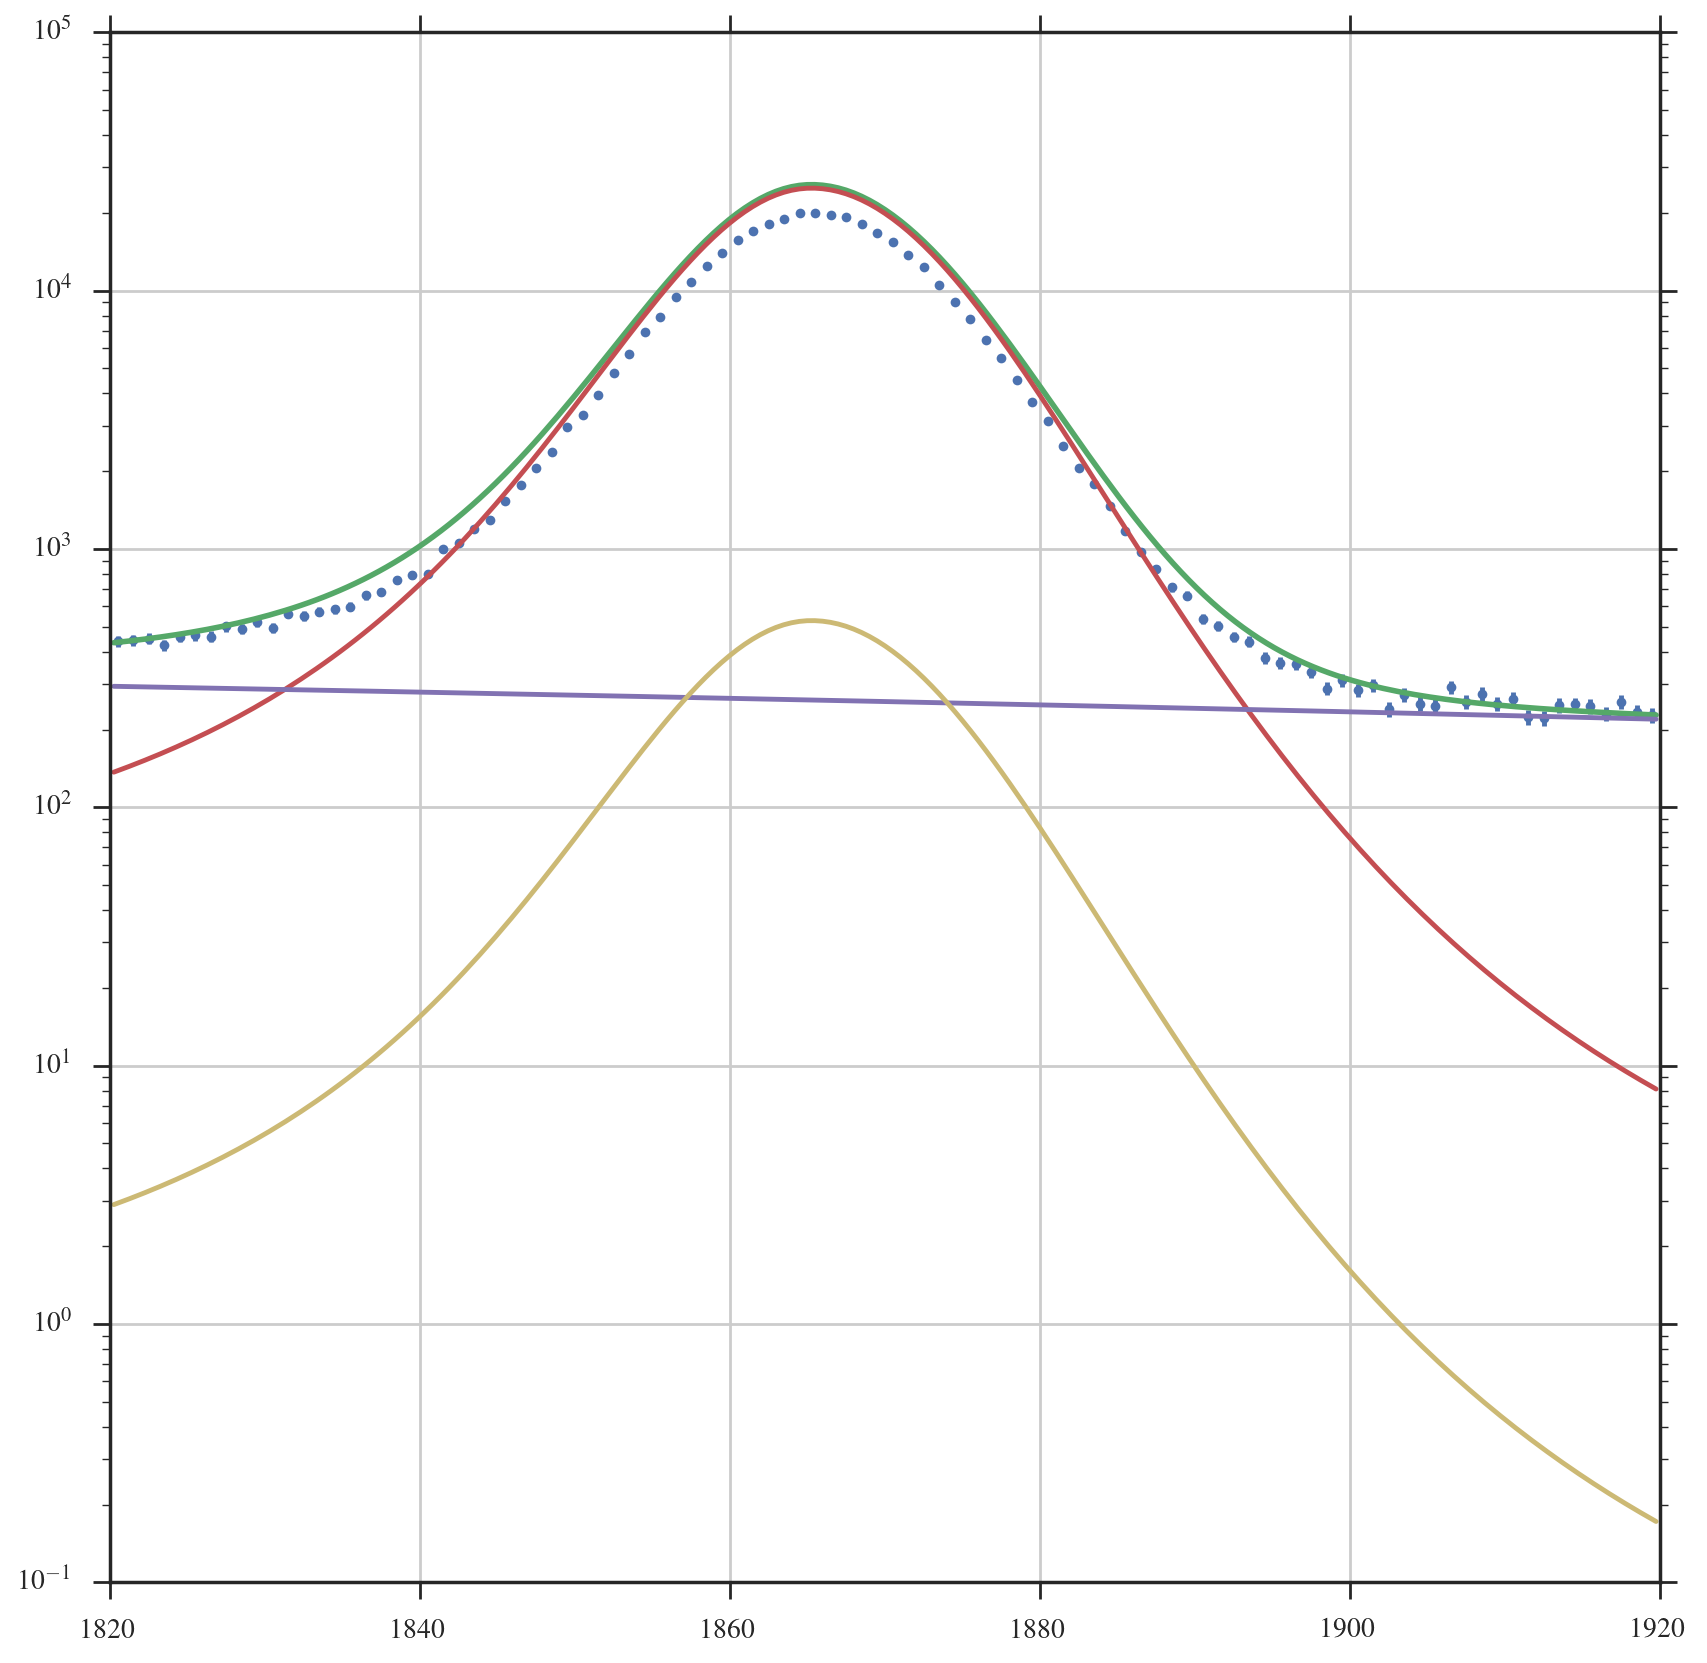

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
BL.draw(minuit, dim=0, parts=True, print_par=False, ax=ax, project_pdf=prods);
ax.set_yscale("log", nonposy='clip')

In [44]:
BL(*vals)

/afs/cern.ch/user/d/dmuller/.virtualenvs/k3pi/lib/python2.7/site-packages/ipykernel/__main__.py:1: LogWarning: x is really small return 0
  if __name__ == '__main__':


nan

In [106]:
BL1 = probfit.BinnedLH(comb_bkg, df[sel][[m(mode.D0), dtf_dm()]].values, extended=True, bound=(fit_range_m, fit_range_dm), bins=(100,100))

In [107]:
BL1(*[faulty[i] for i in probfit.describe(BL1)])

/afs/cern.ch/user/d/dmuller/.virtualenvs/k3pi/lib/python2.7/site-packages/ipykernel/__main__.py:1: LogWarning: x is really small return 0
  if __name__ == '__main__':


nan

In [27]:
BL1 = probfit.BinnedLH(comb_bkg_dm, df[sel][dm()].values, extended=True, bound=(fit_range_dm,), bins=(100,))

In [29]:
BL1(*[faulty[i] for i in probfit.describe(BL1)])

Exception ZeroDivisionError: 'float division' in 'probfit._libstat.xlogyx' ignored


5140629.988774809

In [115]:
[faulty[i] for i in probfit.describe(BL1)]

[-0.032849, 1.060218]

In [61]:
xs = np.linspace?

In [22]:
xs = np.linspace(fit_range_dm[0], fit_range_dm[1], 1000)

In [23]:
ys = np.vectorize(comb_bkg_dm)(xs, -0.032849, 1.060218)

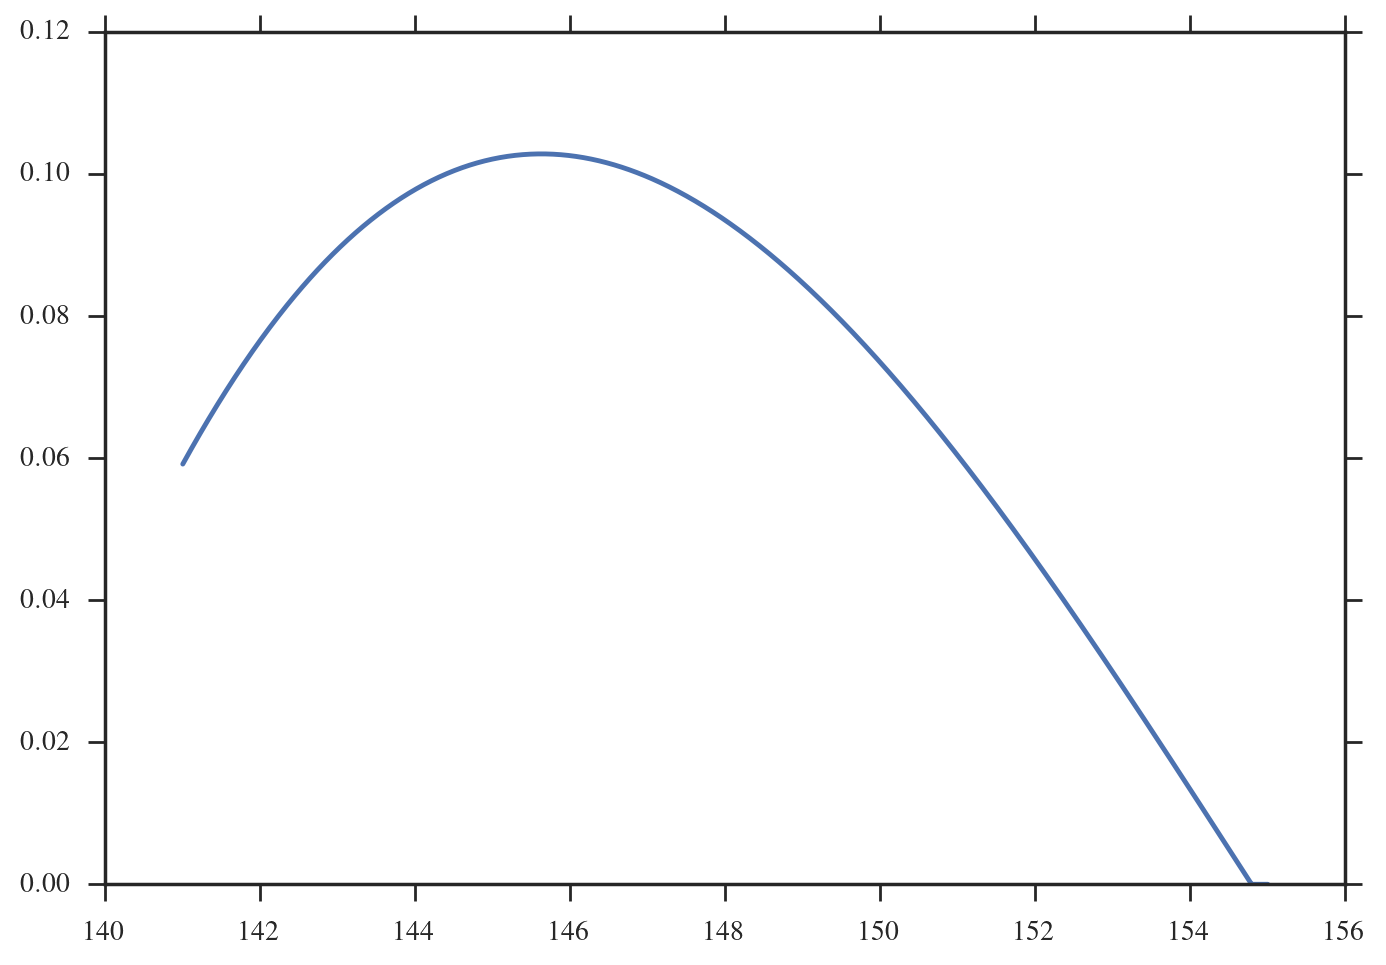

In [24]:
plt.plot(xs,ys)